In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1EUQAZtEBFx8O8ploR-GF6G4pvPB9DOahQGJktlGWIqM/edit?usp=sharing"
spotify=pd.read_csv(url)

In [ ]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
spotify.dropna()
spotify.drop_duplicates()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
sspotify = spotify.sample(n=50)
display(sspotify.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
552,Every Angel is Terrifying,The Weeknd,1,2022,1,7,715,0,37307967,0,...,118,NaN,2,44,52,94,11,0,4,29
135,Calling (Spider-Man: Across the Spider-Verse) ...,"Swae Lee, A Boogie Wit da Hoodie, Metro Boomin...",4,2023,6,2,1051,16,109276132,31,...,140,NaN,2,63,22,54,46,0,12,8
218,Karma (feat. Ice Spice),"Taylor Swift, Ice Spice",2,2023,5,26,588,0,46142772,23,...,90,G#,2,62,7,62,6,0,58,6
151,Bye,Peso Pluma,1,2023,5,26,324,14,95053634,13,...,122,NaN,2,78,70,81,57,0,10,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,1,84,72,74,10,0,34,7


In [ ]:
spot = spotify['released_year']
spot.value_counts()

,count
released_year,
2022,402
2023,175
2021,119
2020,37
2019,36
2017,23
2016,18
2013,13
2014,13


Making a miniset for songs made in the 1900's 2010's and 2020's

In [ ]:
spot190 = spotify[(spotify['released_year'] >= 1990) & (spotify['released_year'] < 2000)]
print(spot190['released_year'].value_counts())

released_year
1999    5
1995    2
1991    2
1992    1
1997    1
1994    1
1996    1
1998    1
Name: count, dtype: int64


In [ ]:
spot220 = spotify[spotify['released_year'] >= 2020]
print(spot220['released_year'].value_counts())

released_year
2022    402
2023    175
2021    119
2020     37
Name: count, dtype: int64


In [ ]:
spot210 = spotify[(spotify['released_year'] > 2010) & (spotify['released_year'] < 2020)]
print(spot210['released_year'].value_counts())

released_year
2019    36
2017    23
2016    18
2014    13
2013    13
2015    11
2018    10
2012    10
2011    10
Name: count, dtype: int64


In [ ]:
spot200 = spotify[(spotify['released_year'] >= 2000) & (spotify['released_year'] <= 2010)]
print(spot200['released_year'].value_counts())

released_year
2010    7
2002    6
2000    4
2004    4
2003    2
2008    2
2007    1
2005    1
Name: count, dtype: int64


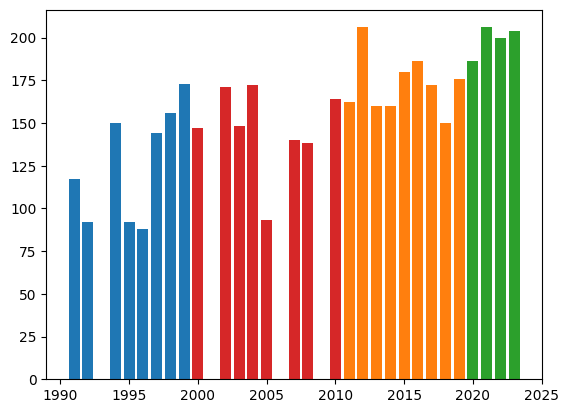

In [ ]:
plt.bar(spot190['released_year'],spot190['bpm'])
plt.bar(spot210['released_year'],spot210['bpm'])
plt.bar(spot220['released_year'],spot220['bpm'])
plt.bar(spot200['released_year'],spot200['bpm'])
plt.show()

In [ ]:
avb190 = spot190['bpm'].mean()
avb200 = spot200['bpm'].mean()
avb210 = spot210['bpm'].mean()
avb220 = spot220['bpm'].mean()

print(f"Average BPM for songs released in the 1990s: {avb190:.2f}")
print(f"Average BPM for songs released in the 2000s: {avb200:.2f}")
print(f"Average BPM for songs released in the 2010s: {avb210:.2f}")
print(f"Average BPM for songs released in the 2020s: {avb220:.2f}")

Average BPM for songs released in the 1990s: 114.29
Average BPM for songs released in the 2000s: 121.22
Average BPM for songs released in the 2010s: 121.41
Average BPM for songs released in the 2020s: 122.92


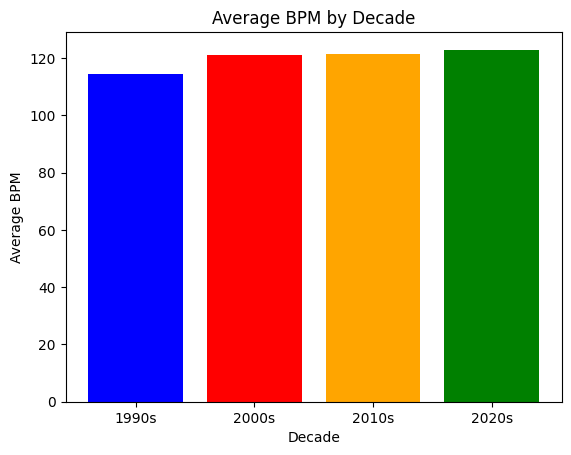

In [ ]:
decades = ['1990s', '2000s', '2010s', '2020s']
average_bpms = [avb190, avb200, avb210, avb220]

plt.bar(decades, average_bpms, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Decade')
plt.ylabel('Average BPM')
plt.title('Average BPM by Decade')
plt.show()

Data analysis using a linear regression modle

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
spotify.dropna(subset=['streams'])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,2,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,2,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,2,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,2,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,2,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,2,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,2,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,2,82,67,77,8,0,12,5


In [ ]:
spotify.head(575)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,2,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,2,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,2,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,2,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Volando - Remix,"Sech, Bad Bunny, Mora",3,2021,7,8,3272,19,610045621,101,...,154,F#,2,66,63,69,21,0,11,7
571,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",3,2021,3,5,14417,0,1115880852,237,...,148,F,2,59,72,62,18,0,9,3
572,Knife Talk (with 21 Savage ft. Project Pat),"Drake, Project Pat, 21 Savage",3,2021,9,3,5199,0,594482982,45,...,146,F,1,85,22,37,13,0,7,30
573,Don't Be Shy,"Ti��sto, Kar",2,2021,8,1,6026,0,566954746,171,...,120,B,1,77,51,79,20,0,26,6


In [ ]:
features = spotify[['bpm','streams']]
labels = spotify['streams']

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state=42)

NameError: name 'monthly_trends' is not defined

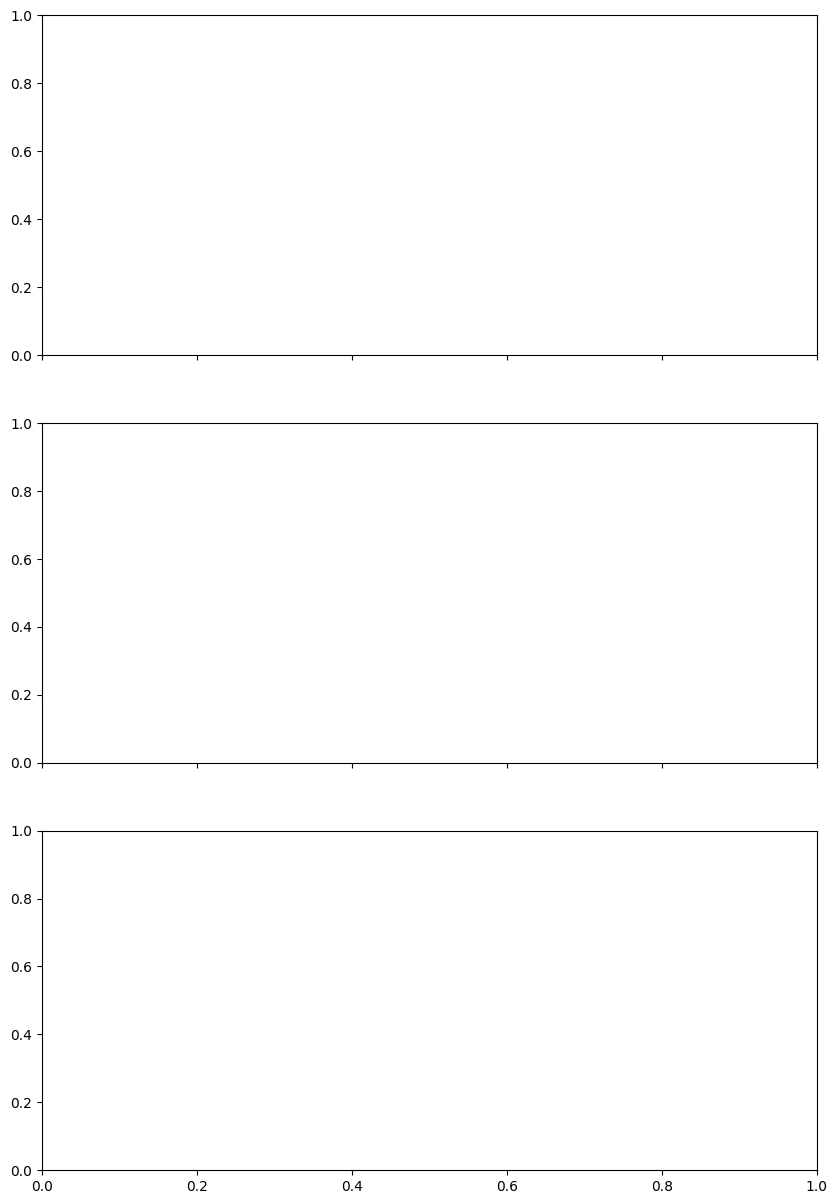

In [2]:
import matplotlib.pyplot as plt

# Plot the graph
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Average Streams
axes[0].plot(monthly_trends.index, monthly_trends['# of Streams the Song has'], marker='o', color='skyblue')
axes[0].set_ylabel('Average Streams')
axes[0].set_title('Monthly Trends: Streams, Energy, and Liveness')

# Average Energy
axes[1].plot(monthly_trends.index, monthly_trends['Energy Level of the Song in %'], marker='o', color='lightcoral')
axes[1].set_ylabel('Average Energy (%)')

# Average Liveness
axes[2].plot(monthly_trends.index, monthly_trends['The presence of special live performance effects in %'], marker='o', color='lightgreen')
axes[2].set_ylabel('Average Liveness (%)')
axes[2].set_xlabel('Released Month')

# Finalize and show plot
plt.tight_layout()
plt.show()

NameError: name 'monthly_trends' is not defined

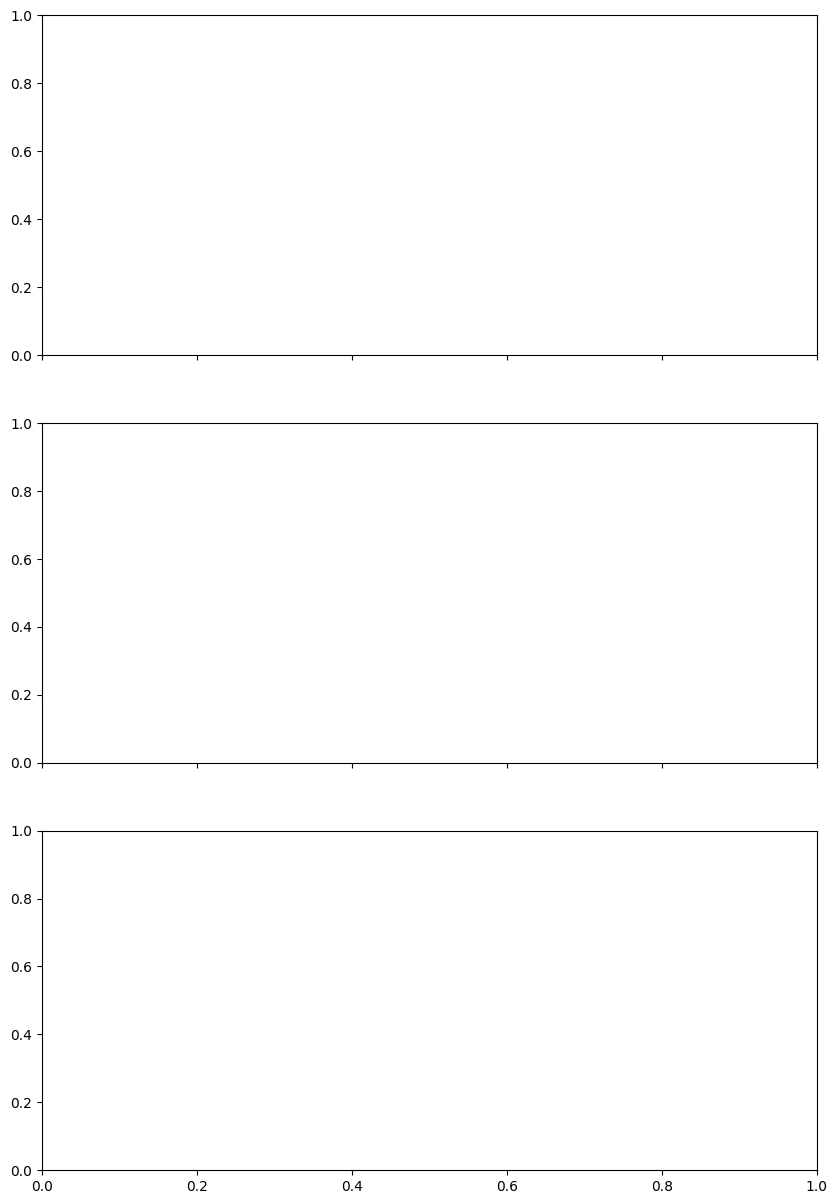

In [4]:
import matplotlib.pyplot as plt

# Plot the graph
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Average Streams
axes[0].plot(monthly_trends.index, monthly_trends['streams'], marker='o', color='skyblue')
axes[0].set_ylabel('Average Streams')
axes[0].set_title('Monthly Trends: Streams, Energy, and Liveness')

# Average Energy
axes[1].plot(monthly_trends.index, monthly_trends['energy_%'], marker='o', color='lightcoral')
axes[1].set_ylabel('Average Energy (%)')

# Average Liveness
axes[2].plot(monthly_trends.index, monthly_trends['liveness_%'], marker='o', color='lightgreen')
axes[2].set_ylabel('Average Liveness (%)')
axes[2].set_xlabel('Released Month')

# Finalize and show plot
plt.tight_layout()
plt.show()

In [8]:
url = "https://docs.google.com/spreadsheets/d/1EUQAZtEBFx8O8ploR-GF6G4pvPB9DOahQGJktlGWIqM/edit?usp=sharing"
csv_url = url.replace("/edit?usp=sharing", "/export?format=csv")
spotify=pd.read_csv(csv_url)

In [9]:
# Calculate monthly trends
spotify['released'] = pd.to_datetime(spotify['released_year'].astype(str) + '-' + spotify['released_month'].astype(str))
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')
monthly_trends = spotify.groupby('released')[['streams', 'energy_%', 'liveness_%']].mean()

display(monthly_trends.head())

,streams,energy_%,liveness_%
released,,,
1930-01-01,90598517.0,80.0,7.0
1942-01-01,395591396.0,25.0,40.0
1946-11-01,389771964.0,15.0,11.0
1950-01-01,473248298.0,32.0,34.0
1952-01-01,395591396.0,36.0,15.0


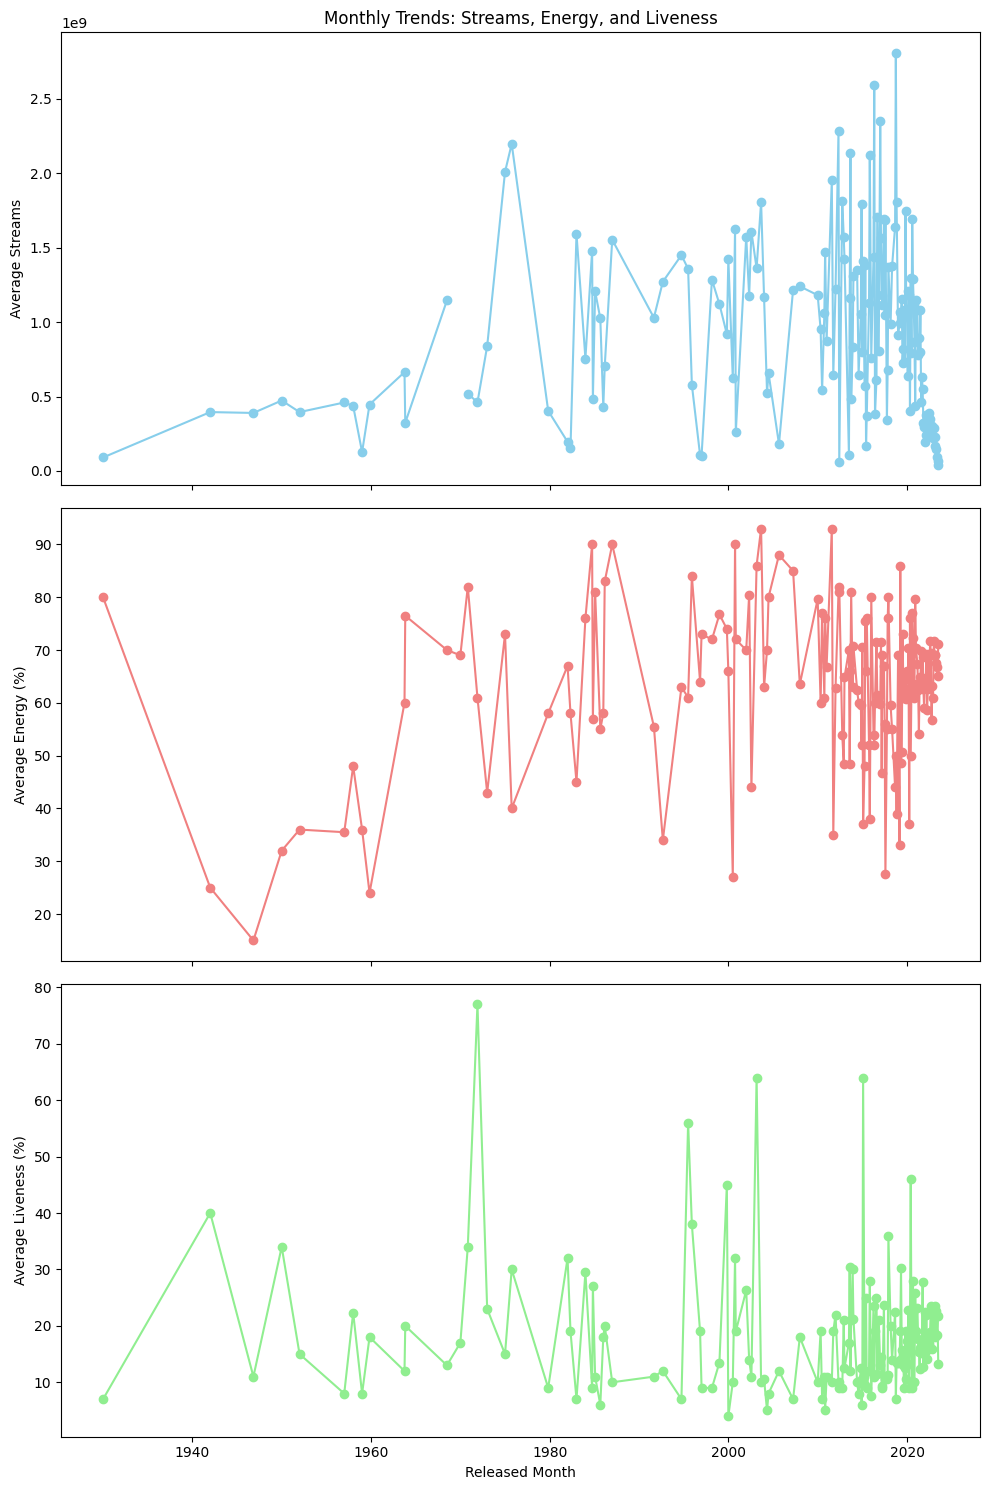

In [10]:
import matplotlib.pyplot as plt

# Plot the graph
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Average Streams
axes[0].plot(monthly_trends.index, monthly_trends['streams'], marker='o', color='skyblue')
axes[0].set_ylabel('Average Streams')
axes[0].set_title('Monthly Trends: Streams, Energy, and Liveness')

# Average Energy
axes[1].plot(monthly_trends.index, monthly_trends['energy_%'], marker='o', color='lightcoral')
axes[1].set_ylabel('Average Energy (%)')

# Average Liveness
axes[2].plot(monthly_trends.index, monthly_trends['liveness_%'], marker='o', color='lightgreen')
axes[2].set_ylabel('Average Liveness (%)')
axes[2].set_xlabel('Released Month')

# Finalize and show plot
plt.tight_layout()
plt.show()